# About Dataset
This list is based on the Forbes Global 2000, 
which ranks the world's 2,000 largest publicly traded companies. 
The Forbes list takes into account a multitude of factors, including the revenue, net profit, 
total assets and market value of each company; 
each factor is given a weighted rank in terms of importance when considering the overall ranking.
The table below also lists the headquarters location and industry sector of each company.
The figures are in billions of US dollars and are for the year 2022. All 50 companies from India in the Forbes 2000 are listed.

# Objective

* Identify the Which Platform have more impact on Sales 

* To build the Model which will help to Predict the future sales based on Money invest in Different Platform 

In [42]:
import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


# Data Import

In [43]:
new = pd.read_csv(r"C:\Users\suvar\Desktop\Linear Regression\2022_Forbes_list.csv") #for an earlier version of Excel, you may need to use the file extension of 'xls'

new

,Unnamed: 0,Rank in India,Changes Rank from last Year,Forbes 2000 rank in World,Changes Rank from last Year.1,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry
0,0,1,(0),54,(+1),Reliance Industries,Mumbai,86.85,7.810,192.59,228.63,Conglomerate
1,1,2,(0),105,(+5),State Bank of India,Mumbai,54.52,4.320,696.51,58.39,Banking
2,2,3,(0),154,(-38),HDFC Bank,Mumbai,22.51,5.110,280.16,98.28,Banking
3,3,4,(0),205,(-23),ICICI Bank,Mumbai,21.89,3.010,226.39,67.90,Banking
4,4,5,(+8),229,(+426),Oil and Natural Gas Corporation,New Delhi,66.28,6.000,75.51,28.62,Oil and gas
5,5,6,(-1),269,(-49),HDFC,Mumbai,18.48,2.910,118.61,52.30,Financials
6,6,7,(+5),358,(+241),Indian Oil Corporation,New Delhi,72.20,3.720,51.73,16.53,Oil and gas
7,7,8,(-2),385,(-63),Tata Consultancy Services,Mumbai,25.73,5.140,18.68,172.79,Infotech
8,8,9,(+18),408,(+531),Tata Steel,Kolkata,31.07,5.010,34.62,20.42,Iron and steel
9,9,10,(+1),432,(+153),Axis Bank,Mumbai,11.41,1.710,152.12,31.32,Banking


In [44]:
new.columns=['Unnamed','RankinIndia','ChangesRankfromlastYear','orbes2000rankinWorld','ChangesRankfromlastYear1','Name','Headquarters','RevenuebillionsUSdoll','ProfitbillionsUSdoll','AssetsbillionsUSdoll','ValuebillionsUSdoll','Industry']
new.columns

Index(['Unnamed', 'RankinIndia', 'ChangesRankfromlastYear',
       'orbes2000rankinWorld', 'ChangesRankfromlastYear1', 'Name',
       'Headquarters', 'RevenuebillionsUSdoll', 'ProfitbillionsUSdoll',
       'AssetsbillionsUSdoll', 'ValuebillionsUSdoll', 'Industry'],
      dtype='object')

# Data Type

In [45]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed                   50 non-null     int64  
 1   RankinIndia               50 non-null     int64  
 2   ChangesRankfromlastYear   50 non-null     object 
 3   orbes2000rankinWorld      50 non-null     int64  
 4   ChangesRankfromlastYear1  50 non-null     object 
 5   Name                      50 non-null     object 
 6   Headquarters              50 non-null     object 
 7   RevenuebillionsUSdoll     50 non-null     float64
 8   ProfitbillionsUSdoll      50 non-null     float64
 9   AssetsbillionsUSdoll      50 non-null     float64
 10  ValuebillionsUSdoll       50 non-null     float64
 11  Industry                  50 non-null     object 
dtypes: float64(4), int64(3), object(5)
memory usage: 4.8+ KB


# EDA
* Identify & Treatment of Outlier 

<AxesSubplot:>

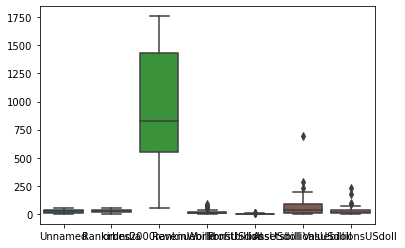

In [46]:
sns.boxplot(data=new)

In [47]:
q1 = new['ValuebillionsUSdoll'].quantile(0.25)
q3 = new['ValuebillionsUSdoll'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

79.5925

In [48]:
new['ValuebillionsUSdoll']=np.where(new['ValuebillionsUSdoll'] > upper_limit,upper_limit,new['ValuebillionsUSdoll']) 

<AxesSubplot:>

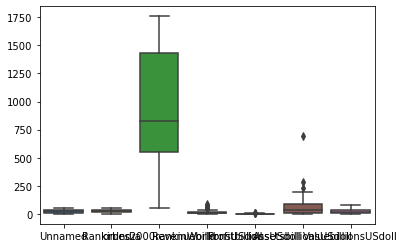

In [49]:
sns.boxplot(data=new)

In [50]:
q1 = new['AssetsbillionsUSdoll'].quantile(0.25)
q3 = new['AssetsbillionsUSdoll'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

198.34125

In [51]:
new[Age'AssetsbillionsUSdoll']=np.where(new['AssetsbillionsUSdoll'] > upper_limit,upper_limit,new['AssetsbillionsUSdoll']) 

<AxesSubplot:>

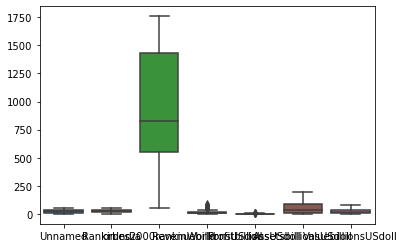

In [52]:
sns.boxplot(data=new)

In [53]:
q1 = new['ProfitbillionsUSdoll'].quantile(0.25)
q3 = new['ProfitbillionsUSdoll'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

5.047499999999999

In [54]:
new['ProfitbillionsUSdoll']=np.where(new['ProfitbillionsUSdoll'] > upper_limit,upper_limit,new['ProfitbillionsUSdoll']) 

<AxesSubplot:>

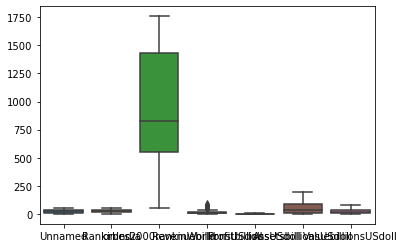

In [55]:
sns.boxplot(data=new)

In [56]:
q1 = new['RevenuebillionsUSdoll'].quantile(0.25)
q3 = new['RevenuebillionsUSdoll'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

40.75500000000001

In [57]:
new['RevenuebillionsUSdoll']=np.where(new['RevenuebillionsUSdoll'] > upper_limit,upper_limit,new['RevenuebillionsUSdoll']) 

<AxesSubplot:>

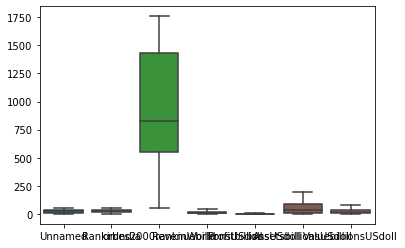

In [58]:
sns.boxplot(data=new)

# Univariate Analysis


In [59]:
new.describe()

,Unnamed,RankinIndia,orbes2000rankinWorld,RevenuebillionsUSdoll,ProfitbillionsUSdoll,AssetsbillionsUSdoll,ValuebillionsUSdoll
count,50.00000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,25.50000,925.680000,14.998100,1.694320,58.474075,28.763000
std,14.57738,14.57738,510.938929,11.884143,1.501329,63.189811,22.438577
min,0.00000,1.00000,54.000000,0.350000,0.010000,0.500000,2.500000
25%,12.25000,13.25000,547.750000,6.192500,0.597500,11.685000,11.817500
50%,24.50000,25.50000,824.500000,11.500000,1.290000,34.590000,21.345000
75%,36.75000,37.75000,1430.250000,20.017500,2.377500,86.347500,38.927500
max,49.00000,50.00000,1759.000000,40.755000,5.047500,198.341250,79.592500


In [60]:
new.isna().sum()

Unnamed                     0
RankinIndia                 0
ChangesRankfromlastYear     0
orbes2000rankinWorld        0
ChangesRankfromlastYear1    0
Name                        0
Headquarters                0
RevenuebillionsUSdoll       0
ProfitbillionsUSdoll        0
AssetsbillionsUSdoll        0
ValuebillionsUSdoll         0
Industry                    0
dtype: int64

#  Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [61]:
new.head()

,Unnamed,RankinIndia,ChangesRankfromlastYear,orbes2000rankinWorld,ChangesRankfromlastYear1,Name,Headquarters,RevenuebillionsUSdoll,ProfitbillionsUSdoll,AssetsbillionsUSdoll,ValuebillionsUSdoll,Industry
0,0,1,(0),54,(+1),Reliance Industries,Mumbai,40.755,5.0475,192.59000,79.5925,Conglomerate
1,1,2,(0),105,(+5),State Bank of India,Mumbai,40.755,4.3200,198.34125,58.3900,Banking
2,2,3,(0),154,(-38),HDFC Bank,Mumbai,22.510,5.0475,198.34125,79.5925,Banking
3,3,4,(0),205,(-23),ICICI Bank,Mumbai,21.890,3.0100,198.34125,67.9000,Banking
4,4,5,(+8),229,(+426),Oil and Natural Gas Corporation,New Delhi,40.755,5.0475,75.51000,28.6200,Oil and gas


In [62]:
# Putting feature variable to X
X = new.drop('RankinIndia', axis= 1)

# Putting response variable to y
y = new[['RankinIndia']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [63]:
df= pd.concat([y_train, X_train], axis=1)
df.head()

,RankinIndia,Unnamed,ChangesRankfromlastYear,orbes2000rankinWorld,ChangesRankfromlastYear1,Name,Headquarters,RevenuebillionsUSdoll,ProfitbillionsUSdoll,AssetsbillionsUSdoll,ValuebillionsUSdoll,Industry
49,50,49,(0),1759,(+208),DMart,Mumbai,4.000,0.20,1.93000,34.12,Retail
35,36,35,(+5),1348,(+203),Indian Bank,Chennai,6.170,0.65,89.96000,2.63,Banking
1,2,1,(0),105,(+5),State Bank of India,Mumbai,40.755,4.32,198.34125,58.39,Banking
6,7,6,(+5),358,(+241),Indian Oil Corporation,New Delhi,40.755,3.72,51.73000,16.53,Oil and gas
8,9,8,(+18),408,(+531),Tata Steel,Kolkata,31.070,5.01,34.62000,20.42,Iron and steel


# Correlation Matrix


In [64]:
new.corr()

,Unnamed,RankinIndia,orbes2000rankinWorld,RevenuebillionsUSdoll,ProfitbillionsUSdoll,AssetsbillionsUSdoll,ValuebillionsUSdoll
Unnamed,1.000000,1.000000,0.990842,-0.712864,-0.814003,-0.470203,-0.456784
RankinIndia,1.000000,1.000000,0.990842,-0.712864,-0.814003,-0.470203,-0.456784
orbes2000rankinWorld,0.990842,0.990842,1.000000,-0.698397,-0.794330,-0.496899,-0.432349
RevenuebillionsUSdoll,-0.712864,-0.712864,-0.698397,1.000000,0.753071,0.320073,0.202936
ProfitbillionsUSdoll,-0.814003,-0.814003,-0.794330,0.753071,1.000000,0.351792,0.482785
AssetsbillionsUSdoll,-0.470203,-0.470203,-0.496899,0.320073,0.351792,1.000000,0.156910
ValuebillionsUSdoll,-0.456784,-0.456784,-0.432349,0.202936,0.482785,0.156910,1.000000


<AxesSubplot:>

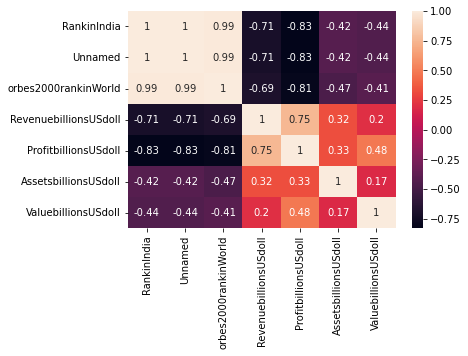

In [65]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:title={'center':'Rank in India vs Forbes 2000 rank in World'}, xlabel='orbes2000rankinWorld', ylabel='RankinIndia'>

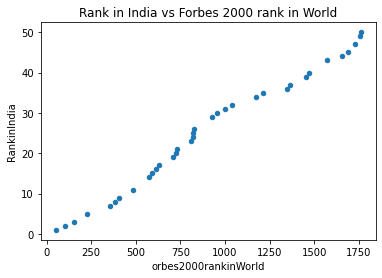

In [66]:
df.plot.scatter(x='orbes2000rankinWorld', y='RankinIndia', title='Rank in India vs Forbes 2000 rank in World')

<AxesSubplot:title={'center':'Rank in India vs Forbes 2000 rank in World'}, xlabel='orbes2000rankinWorld', ylabel='RankinIndia'>

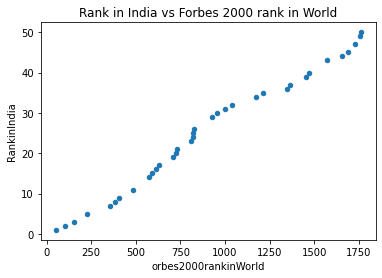

In [67]:
df.plot.scatter(x='orbes2000rankinWorld', y='RankinIndia', title='Rank in India vs Forbes 2000 rank in World')

#### Forbes 2000 rank in World have 99%  strong positve correlation with Rank in India

* Forbes 2000 rank in World have have high impact on Rank in India
* There is Multiple colinrarity in data 

### Multicolinearity (with the help of VIF)


In [68]:
df=df.drop(['ChangesRankfromlastYear','ChangesRankfromlastYear1','Name','Headquarters','Industry'],axis=1)
df

,RankinIndia,Unnamed,orbes2000rankinWorld,RevenuebillionsUSdoll,ProfitbillionsUSdoll,AssetsbillionsUSdoll,ValuebillionsUSdoll
49,50,49,1759,4.000,0.2000,1.93000,34.1200
35,36,35,1348,6.170,0.6500,89.96000,2.6300
1,2,1,105,40.755,4.3200,198.34125,58.3900
6,7,6,358,40.755,3.7200,51.73000,16.5300
8,9,8,408,31.070,5.0100,34.62000,20.4200
22,23,22,809,11.190,1.4900,11.57000,39.0900
46,47,46,1730,5.720,0.6900,5.51000,16.6100
28,29,28,925,12.680,0.7300,164.71000,5.5300
34,35,34,1215,10.980,1.5300,12.03000,9.5200
43,44,43,1656,30.000,0.1500,2.70000,2.5000


In [69]:
X1=df.drop(['RankinIndia'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Unnamed                  424.846944
orbes2000rankinWorld     443.475072
RevenuebillionsUSdoll      6.907191
ProfitbillionsUSdoll       8.129445
AssetsbillionsUSdoll       2.848685
ValuebillionsUSdoll        3.749622
dtype: float64

# Model Building


*  H0 :- There is no Linear relationship between Unnamed: 0	Forbes 2000 rank in World,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$)

* Vs 

*  H1 :- There is Linear relationship between Unnamed: 0	Forbes 2000 rank in World,Revenue(billions US$),	Profit(billions US$),	Assets(billions US$),	Value(billions US$) 

    Alpha = 0.05 (5%)

In [70]:
import statsmodels.formula.api as smf
model2 = smf.ols('RankinIndia ~ RevenuebillionsUSdoll + ProfitbillionsUSdoll + AssetsbillionsUSdoll + ValuebillionsUSdoll',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            RankinIndia   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     20.67
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           2.88e-08
Time:                        20:11:41   Log-Likelihood:                -119.87
No. Observations:                  35   AIC:                             249.7
Df Residuals:                      30   BIC:                             257.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                42.2059      2.720     15.515      0.000      36.650      47.762
RevenuebillionsUSdoll    -0.2312      0.170     -1.358      0.185      -0.579       0.116
ProfitbillionsUSdoll     -5.1358      1.475     -3.481      0.002      -8.149      -2.123
AssetsbillionsUSdoll     -0.0321      0.023     -1.424      0.165      -0.078       0.014
ValuebillionsUSdoll      -0.0628      0.073     -0.866      0.393      -0.211       0.085
==============================================================================
Omnibus:                        4.702   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                3.295
Skew:                          -0.694   Prob(JB):                        0.193
Kurtosis:                       3.577   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is Linear relationship between Rank in India and RevenuebillionsUSdoll , ProfitbillionsUSdoll
* 99% is accuracy of model , so we say model is good fit 
* Y = 42.2059 + -0.2312 * RevenuebillionsUSdoll	 +-5.1358 * ProfitbillionsUSdoll

# Multicolinearity (with the help of VIF)


In [71]:
X1=df.loc[:,['RevenuebillionsUSdoll', 'ProfitbillionsUSdoll']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

RevenuebillionsUSdoll    5.15416
ProfitbillionsUSdoll     5.15416
dtype: float64

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

In [72]:
df.head()

,RankinIndia,Unnamed,orbes2000rankinWorld,RevenuebillionsUSdoll,ProfitbillionsUSdoll,AssetsbillionsUSdoll,ValuebillionsUSdoll
49,50,49,1759,4.000,0.20,1.93000,34.12
35,36,35,1348,6.170,0.65,89.96000,2.63
1,2,1,105,40.755,4.32,198.34125,58.39
6,7,6,358,40.755,3.72,51.73000,16.53
8,9,8,408,31.070,5.01,34.62000,20.42


In [74]:
#Y = intercet + b1 * RevenuebillionsUSdoll+ b2 * ProfitbillionsUSdoll
Y = 42.2059 + -0.2312 * 6.170+-5.1358 * 0.65
Y

37.441126

In [75]:
df['fitted_value']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df.head()

,RankinIndia,Unnamed,orbes2000rankinWorld,RevenuebillionsUSdoll,ProfitbillionsUSdoll,AssetsbillionsUSdoll,ValuebillionsUSdoll,fitted_value,residual
49,50,49,1759,4.000,0.20,1.93000,34.12,38.047590,11.952410
35,36,35,1348,6.170,0.65,89.96000,2.63,34.385592,1.614408
1,2,1,105,40.755,4.32,198.34125,58.39,0.553839,1.446161
6,7,6,358,40.755,3.72,51.73000,16.53,10.976031,-3.976031
8,9,8,408,31.070,5.01,34.62000,20.42,6.895647,2.104353


# Linearity


<AxesSubplot:title={'center':'RankinIndia vs RevenuebillionsUSdoll'}, xlabel='RevenuebillionsUSdoll', ylabel='RankinIndia'>

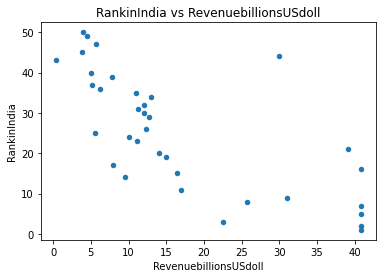

In [76]:
df.plot.scatter(x='RevenuebillionsUSdoll', y='RankinIndia', title='RankinIndia vs RevenuebillionsUSdoll')

# Homoscedasicity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

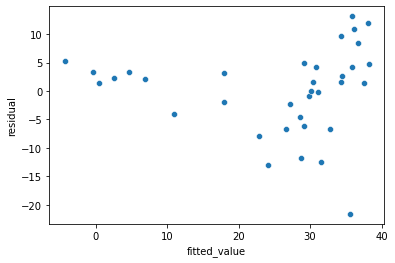

In [77]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

# Normality

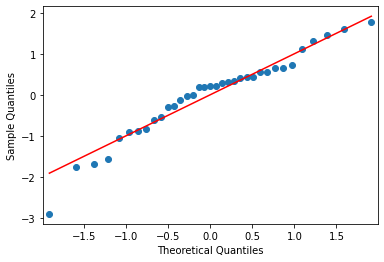

In [78]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# Model Error are IID 

<AxesSubplot:ylabel='Frequency'>

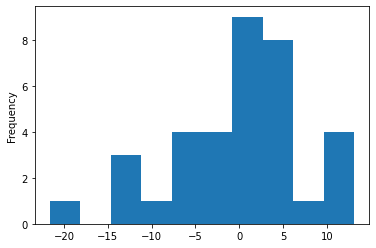

In [79]:
df['residual'].plot.hist()

# Prediction on Test Data (unseen data)


In [80]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,Unnamed,ChangesRankfromlastYear,orbes2000rankinWorld,ChangesRankfromlastYear1,Name,Headquarters,RevenuebillionsUSdoll,ProfitbillionsUSdoll,AssetsbillionsUSdoll,ValuebillionsUSdoll,Industry,RankinIndia
9,9,(+1),432,(+153),Axis Bank,Mumbai,11.41,1.71,152.12000,31.32,Banking,10
37,37,(-1),1514,(+98),Indian Railway Finance Corporation,New Delhi,2.55,0.82,58.03000,3.83,Financials,38
45,45,(+4),1705,(+295),Adani Transmission,Ahmedabad,1.49,0.16,6.11000,38.15,Utilities,46
11,11,(-5),514,(-148),Larsen & Toubro,Mumbai,20.53,1.12,40.82000,31.13,Capital goods,12
3,3,(0),205,(-23),ICICI Bank,Mumbai,21.89,3.01,198.34125,67.90,Banking,4


In [81]:
df_test['Prediction']=model2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,Unnamed,ChangesRankfromlastYear,orbes2000rankinWorld,ChangesRankfromlastYear1,Name,Headquarters,RevenuebillionsUSdoll,ProfitbillionsUSdoll,AssetsbillionsUSdoll,ValuebillionsUSdoll,Industry,RankinIndia,Prediction
9,9,(+1),432,(+153),Axis Bank,Mumbai,11.41,1.71,152.12000,31.32,Banking,10,23.930014
37,37,(-1),1514,(+98),Indian Railway Finance Corporation,New Delhi,2.55,0.82,58.03000,3.83,Financials,38,35.299973
45,45,(+4),1705,(+295),Adani Transmission,Ahmedabad,1.49,0.16,6.11000,38.15,Utilities,46,38.445880
11,11,(-5),514,(-148),Larsen & Toubro,Mumbai,20.53,1.12,40.82000,31.13,Capital goods,12,28.438817
3,3,(0),205,(-23),ICICI Bank,Mumbai,21.89,3.01,198.34125,67.90,Banking,4,11.046372


In [82]:
Y = 42.2059 + -0.2312 * 2.55+-5.1358 * 0.82
Y

37.404984

# Test

In [95]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.RankinIndia, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,1))

R2 score for model Performance on Test 0.7


# Train

In [93]:
from sklearn.metrics import r2_score
r2 = r2_score(df.RankinIndia, df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,3))

R2 score for model Performance on Test 0.734


* Model is good fit & Performance on Test data is also good fit 

# Prediction for Live Data  -- Population


In [106]:
d1 = {'Customer':pd.Series(['Suvarna','Shubhangi','Vidya']),
      'RevenuebillionsUSdoll':pd.Series([93.9,73.5,200]),
      'ProfitbillionsUSdoll' :pd.Series([43.5,18,35]),
      'AssetsbillionsUSdoll' :pd.Series([50.5,13,24]),
     }
live = pd.DataFrame(d1)
live

,Customer,RevenuebillionsUSdoll,ProfitbillionsUSdoll,AssetsbillionsUSdoll
0,Suvarna,93.9,43.5,50.5
1,Shubhangi,73.5,18.0,13.0
2,Vidya,200.0,35.0,24.0


In [104]:
live['future Prediction']=np.round(model.predict(live),2)
live

NameError: name 'model' is not defined